In [1]:
import pandas as pd

In [2]:
import pandas_datareader as web

In [3]:
import matplotlib.pyplot as plt

In [4]:
import keras

Using TensorFlow backend.


In [5]:
import urllib3
import certifi
from bs4 import BeautifulSoup
from textblob import TextBlob

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np

In [7]:
import os

In [8]:
from pandas import DataFrame

In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\deark\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\deark\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [10]:
def clean_data(df):
#     df = web.DataReader(stock_name, 'yahoo', '2018-7-1', '2020-7-1')['Open']
    
    df = df.div(df[0])
    
    data = df.tolist()
    
    data_input = []
    data_output = []

    size = len(data)
    # size = len(data)

    for i in range(50, size):
        data_input.append(data[i-50:i])
        data_output.append([data[i]])
        
    return data_input, data

In [11]:
def predict(slice_point, days_predicted, data_input, data):
    
    predictions = []
    predictions = model.predict(data_input[0:slice_point])
    predictions = predictions.reshape(len(predictions)).tolist()
    
    for i in range(0, days_predicted):
        predictions.append(float(model.predict([predictions[len(predictions)-numInp:len(predictions)]])[0][0])* (1 + (np.random.normal()/100)))
    
#     DataFrame(predictions, columns=['Data'])['Data'].plot(figsize=(16,6))
#     DataFrame(data[numInp:], columns=['Data'])['Data'].plot()

    return DataFrame(predictions, columns=['Price'])['Price']

In [12]:
def pie_portfolio(values, names, num_sectors, clear_negatives):
    
    if clear_negatives:
        min_value = min(values)
        
        for i in range(0, len(values)):
            values[i]-=(min_value * 1.5)
    
    max_sectors = sorted(values, reverse=True)[:num_sectors]
    
    sector_names = []
    
    for value in max_sectors:
        sector_names.append(names[values.index(value)])
        
    plt.pie(max_sectors, labels = sector_names)
    
    total_score = sum(max_sectors)

    for i in range(0, len(max_sectors)):
        print(sector_names[i] + ': ' + str(max_sectors[i]/total_score * 100) + '%')
        

In [13]:
def google_news(search_param):
    
    search_param = search_param.replace(' ', '%20')
    
    http = urllib3.PoolManager(
    cert_reqs='CERT_REQUIRED',
    ca_certs=certifi.where())

    num_pages = 8

    search = 'https://www.google.com/search?q=' + search_param +'&tbm=nws&start='
    
    news_titles = []
    news_info = []

    for i in range(num_pages):
        r = http.request('GET', search + str(i*10))
        soup = BeautifulSoup(r.data, 'html.parser')
        news_titles.append(soup.find_all("div", {"class": "BNeawe vvjwJb AP7Wnd"}))
        news_info.append(soup.find_all("div", {"class": "BNeawe s3v9rd AP7Wnd"}))
        
    for i in range(num_pages):
        for j in range(len(news_titles[i])):
            news_titles[i][j] = str(news_titles[i][j])[34:len(news_titles[i][j])-7]

        for k in range(len(news_info[i])):
            if k%2 == 0:
                news_info[i][k] = ""
            else:
                news_info[i][k] = str(news_info[i][k])[117:len(news_info[i][k])-9]

        while('' in news_info[i]) : 
            news_info[i].remove('')
        
    numPositive = 0
    numNegative = 0

    for i in range(len(news_titles)):
        for j in range(len(news_titles[i])):
            blob = TextBlob(news_titles[i][j])
            for sentence in blob.sentences:
                polarity_val = sentence.sentiment.polarity
                if polarity_val != 0:
                    if polarity_val < 0.1: numNegative+=1
                    else: numPositive+=1


    for i in range(len(news_info)):
        for j in range(len(news_info[i])):
            blob = TextBlob(news_info[i][j])
            for sentence in blob.sentences:
                polarity_val = sentence.sentiment.polarity
                if polarity_val != 0:
                    if polarity_val < 0.1: numNegative+=1
                    else: numPositive+=1
    
    return (numPositive/(numPositive + numNegative))-(numNegative/(numPositive + numNegative))

In [14]:
def fill_with_sectors(sector_values):

    for i in range(0, len(sectors)):
        dataset.append(pd.read_excel('Data/' + sector_values[i] +'.xls', index_col=0))

In [15]:
def fill_with_stocks(stocks):
    
    for stock in stocks:
        dataset.append(web.DataReader(stock, data_source = 'yahoo', start = '6-15-2019', end = '6-15-2020'))
    
    for dataframe in dataset:
        dataframe.rename(columns={'Close':'Price'}, inplace=True)
        del dataframe['Open']
        del dataframe['High']
        del dataframe['Low']
        del dataframe['Volume']
        del dataframe['Adj Close']

In [16]:
dataset = []

In [17]:
# sectors = ['CommunicationServices', 'ConsumerDiscretionary',
#                'ConsumerStaples', 'Energy', 'Financials',
#                'HealthCare', 'Industrials', 'Materials',
#                'RealEstate', 'Technology', 'Utilities']

# fill_with_sectors(sectors)


sectors = ['MHO', 'SKT', 'JWN', 'IHRT', 'MSFT']

fill_with_stocks(sectors)

In [18]:
numInp = 50
model = tf.keras.models.load_model('stock_model.h5')

In [19]:
for i in range(0, len(dataset)):
    dataset[i] = dataset[i].div(dataset[i]['Price'][0])

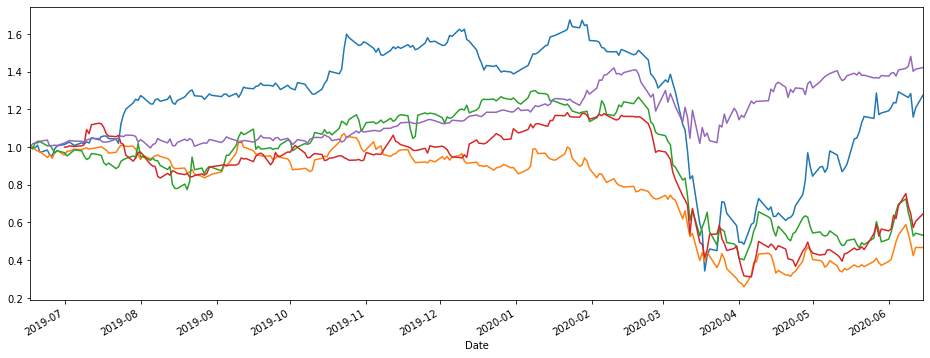

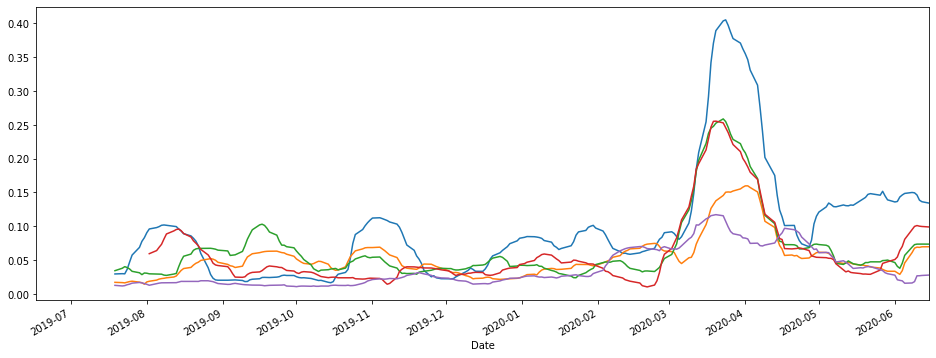

1.8335630793163287
1.1120093017132882
0.2831084586441663
1.401996443964974
1.5124088882456321


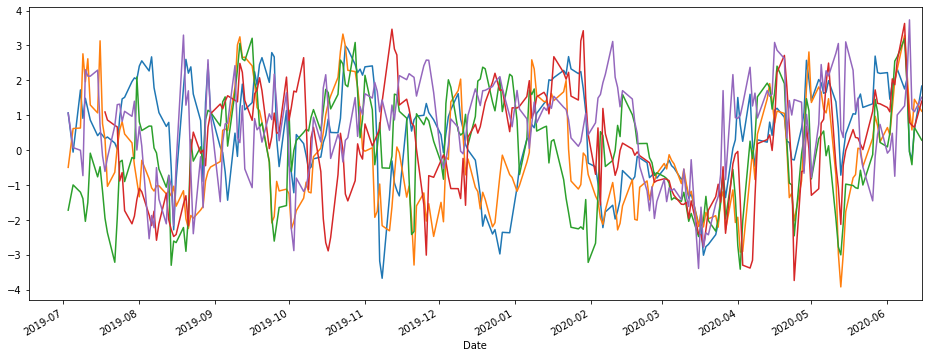

In [20]:
for i in range(0, len(dataset)):
    dataset[i]['Price'].plot(figsize=(16,6))
    
plt.show()

for i in range(0, len(dataset)):
    dataset[i]['Price'].rolling(24).std().plot(figsize=(16,6))

plt.show()

for i in range(0, len(dataset)):
    df_copy = dataset[i].copy()
    for j in range(0, len(dataset[i])):
        df_copy['Price'][j] = (dataset[i]['Price'][j] - dataset[i]['Price'][j-10]) / (dataset[i]['Price'][j-12:j+12].std())
        
    df_copy['Price'].plot(figsize=(16,6))
    
    print(df_copy['Price'][len(df_copy)-1])
    
plt.show()

In [29]:
ml_dataframe = []
sector_scores = []

for i in range(0, len(dataset)):
    data_input, data = clean_data(dataset[i]['Price'])
    ml_dataframe.append(predict(len(data)-75, 75, data_input, data))

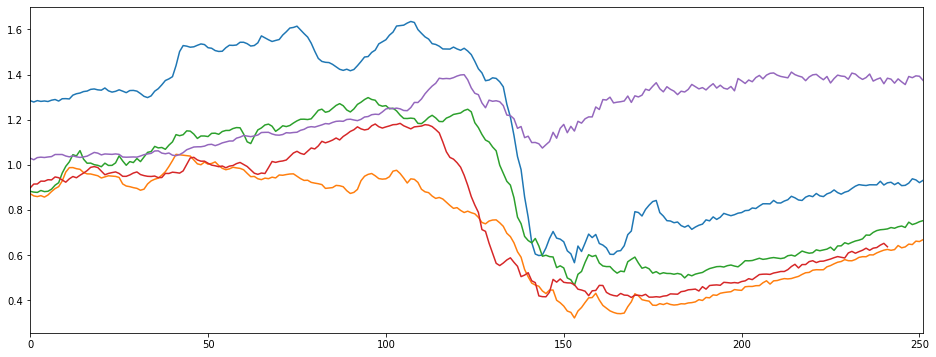

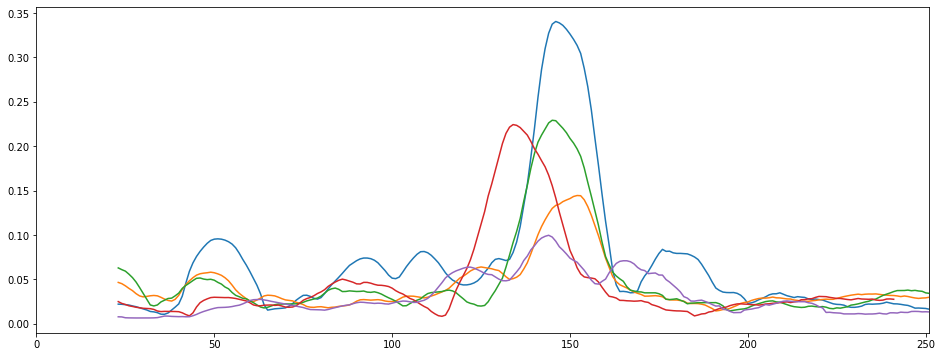

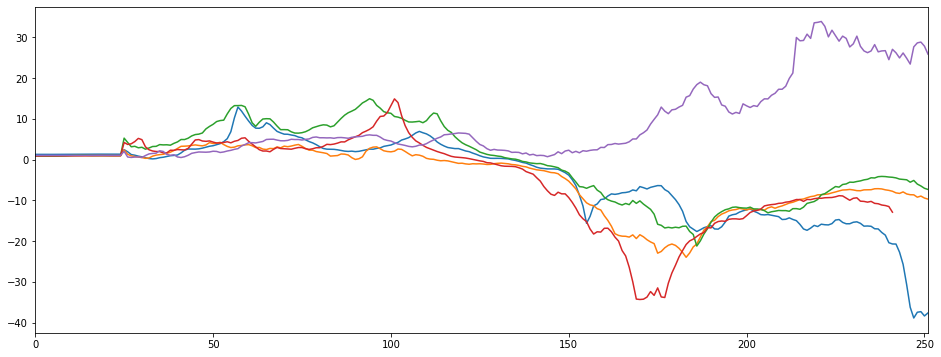

In [30]:
for i in range(0, len(ml_dataframe)):
    ml_dataframe[i].plot(figsize=(16,6))
    
plt.show()

for i in range(0, len(ml_dataframe)):
    ml_dataframe[i].rolling(24).std().plot(figsize=(16,6))

plt.show()

for i in range(0, len(ml_dataframe)):
    df_copy = ml_dataframe[i].copy()
    for j in range(25, len(ml_dataframe[i])):
        df_copy[j] = (ml_dataframe[i][j] - ml_dataframe[i][j-j]) / (ml_dataframe[i][j-15:j+15].std())
        
    df_copy.plot(figsize=(16,6))
    
    sector_scores.append(df_copy[len(df_copy)-1])
    
plt.show()

In [31]:
print(sector_scores)

[-37.62392206335114, -9.698555981380641, -7.325744944471571, -12.89903379037808, 25.871693118676603]


MSFT: 34.22297630279942%
JWN: 20.419688824147837%
SKT: 19.433088809632522%
IHRT: 18.10235011881539%
MHO: 7.821895944604833%


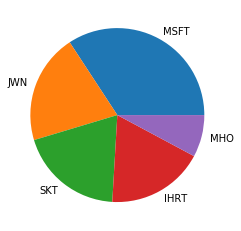

In [32]:
pie_portfolio(sector_scores, sectors, 5, True)